# Graph Sampling of Co-Authorship Social Nework of Arxiv

In [2]:
pip install littleballoffur

     |████████████████████████████████| 3.0MB 10.2MB/s 
  Created wheel for littleballoffur: filename=littleballoffur-2.1.7-cp36-none-any.whl size=40180 sha256=8a2335267e8381fc93dfa74eb9d3b91a8f62a7e340bcae83be622efededabddc
  Stored in directory: /root/.cache/pip/wheels/78/2c/9a/1ef0112040d04026b180ab61f8a63d3d960fc1b16a471a60fe
  Created wheel for networkit: filename=networkit-8.0-cp36-cp36m-linux_x86_64.whl size=8028436 sha256=35c769a7c32bfa100da18d830ce63dfa5870fb653856bb0da3c6ca174a2b6369
  Stored in directory: /root/.cache/pip/wheels/69/43/a6/9f253843afcae8370e0f50964224c2dd84142d0a57be0440dc
Successfully built littleballoffur networkit


Import the Dataset


In [4]:
import pandas as pd
import io

df = pd.read_csv('Data.csv')
df

,From,To
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931
...,...,...
28975,10154,9224
28976,10154,16830
28977,11113,21723
28978,11113,23836


Convert the Data into edges list and create the graph


In [5]:
# Build your graph
G=nx.from_pandas_edgelist(df, 'From', 'To')

Generate a subgraph of the connected component

In [8]:
ListGraph = (G.subgraph(c) for c in nx.connected_components(G))
A = list(ListGraph)[0]

Re index the node labels

In [11]:


reindexed_graph = nx.relabel.convert_node_labels_to_integers(A, first_label=0, ordering='default') 

Generate a Sample from the Graph

In [13]:
import networkx as nx
from littleballoffur import DiffusionSampler



sampler = DiffusionSampler()

new_graph = sampler.sample(reindexed_graph)

Draw the generated sample

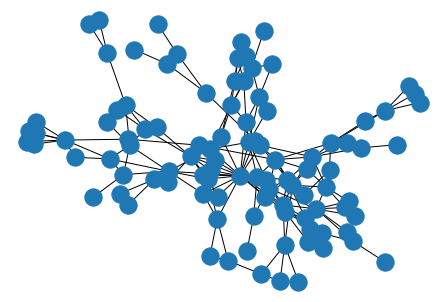

In [15]:
# Plot it
nx.draw(new_graph, with_labels=False)

Number of Nodes and edges in the sample 

In [16]:
new_graph.number_of_edges()

200

In [17]:
new_graph.number_of_nodes()

100